## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055
0:	learn: 0.9629179	total: 52.5ms	remaining: 52.5s
1:	learn: 0.9301086	total: 56.6ms	remaining: 28.3s
2:	learn: 0.9005637	total: 60.2ms	remaining: 20s
3:	learn: 0.8720983	total: 63.8ms	remaining: 15.9s
4:	learn: 0.8467410	total: 67.2ms	remaining: 13.4s
5:	learn: 0.8226672	total: 70.6ms	remaining: 11.7s
6:	learn: 0.7994702	total: 74ms	remaining: 10.5s
7:	learn: 0.7784272	total: 77.2ms	remaining: 9.57s
8:	learn: 0.7602192	total: 80.9ms	remaining: 8.91s
9:	learn: 0.7412421	total: 84.2ms	remaining: 8.34s
10:	learn: 0.7247930	total: 87.5ms	remaining: 7.86s
11:	learn: 0.7089951	total: 90.6ms	remaining: 7.46s
12:	learn: 0.6951345	total: 93.9ms	remaining: 7.13s
13:	learn: 0.6809276	total: 97ms	remaining: 6.83s
14:	learn: 0.6692630	total: 100ms	remaining: 6.57s
15:	learn: 0.6588323	total: 103ms	remaining: 6.35s
16:	learn: 0.6472700	total: 106ms	remaining: 6.15s
17:	learn: 0.6379982	total: 110ms	remaining: 5.97s
18:	learn: 0.6294674	total: 113ms	remaining: 5.82s
19:

38:	learn: 0.5255485	total: 176ms	remaining: 4.34s
39:	learn: 0.5217941	total: 179ms	remaining: 4.3s
40:	learn: 0.5196440	total: 182ms	remaining: 4.26s
41:	learn: 0.5170220	total: 185ms	remaining: 4.22s
42:	learn: 0.5141148	total: 188ms	remaining: 4.19s
43:	learn: 0.5116444	total: 192ms	remaining: 4.17s
44:	learn: 0.5100547	total: 195ms	remaining: 4.13s
45:	learn: 0.5069096	total: 198ms	remaining: 4.11s
46:	learn: 0.5051685	total: 201ms	remaining: 4.07s
47:	learn: 0.5033968	total: 204ms	remaining: 4.04s
48:	learn: 0.5012433	total: 207ms	remaining: 4.02s
49:	learn: 0.4986132	total: 210ms	remaining: 3.99s
50:	learn: 0.4968022	total: 214ms	remaining: 3.98s
51:	learn: 0.4951632	total: 217ms	remaining: 3.95s
52:	learn: 0.4928924	total: 220ms	remaining: 3.93s
53:	learn: 0.4917272	total: 223ms	remaining: 3.91s
54:	learn: 0.4895079	total: 226ms	remaining: 3.89s
55:	learn: 0.4881884	total: 229ms	remaining: 3.87s
56:	learn: 0.4861566	total: 233ms	remaining: 3.85s
57:	learn: 0.4850201	total: 236m

100:	learn: 0.4487329	total: 368ms	remaining: 3.27s
101:	learn: 0.4481325	total: 371ms	remaining: 3.26s
102:	learn: 0.4475445	total: 374ms	remaining: 3.25s
103:	learn: 0.4466014	total: 377ms	remaining: 3.25s
104:	learn: 0.4461730	total: 380ms	remaining: 3.24s
105:	learn: 0.4457259	total: 383ms	remaining: 3.23s
106:	learn: 0.4451085	total: 386ms	remaining: 3.22s
107:	learn: 0.4447909	total: 389ms	remaining: 3.21s
108:	learn: 0.4440936	total: 392ms	remaining: 3.21s
109:	learn: 0.4435519	total: 395ms	remaining: 3.2s
110:	learn: 0.4431075	total: 398ms	remaining: 3.19s
111:	learn: 0.4425498	total: 401ms	remaining: 3.18s
112:	learn: 0.4419106	total: 405ms	remaining: 3.18s
113:	learn: 0.4414425	total: 408ms	remaining: 3.17s
114:	learn: 0.4407446	total: 411ms	remaining: 3.16s
115:	learn: 0.4402011	total: 414ms	remaining: 3.15s
116:	learn: 0.4398559	total: 417ms	remaining: 3.15s
117:	learn: 0.4392990	total: 420ms	remaining: 3.14s
118:	learn: 0.4389153	total: 423ms	remaining: 3.13s
119:	learn: 0

161:	learn: 0.4197073	total: 555ms	remaining: 2.87s
162:	learn: 0.4192052	total: 558ms	remaining: 2.87s
163:	learn: 0.4187949	total: 561ms	remaining: 2.86s
164:	learn: 0.4184572	total: 564ms	remaining: 2.85s
165:	learn: 0.4180680	total: 567ms	remaining: 2.85s
166:	learn: 0.4176884	total: 570ms	remaining: 2.84s
167:	learn: 0.4173026	total: 573ms	remaining: 2.84s
168:	learn: 0.4170486	total: 576ms	remaining: 2.83s
169:	learn: 0.4165960	total: 580ms	remaining: 2.83s
170:	learn: 0.4161870	total: 583ms	remaining: 2.82s
171:	learn: 0.4156228	total: 586ms	remaining: 2.82s
172:	learn: 0.4153041	total: 589ms	remaining: 2.81s
173:	learn: 0.4148857	total: 592ms	remaining: 2.81s
174:	learn: 0.4144190	total: 595ms	remaining: 2.81s
175:	learn: 0.4140875	total: 598ms	remaining: 2.8s
176:	learn: 0.4136755	total: 601ms	remaining: 2.79s
177:	learn: 0.4133860	total: 604ms	remaining: 2.79s
178:	learn: 0.4129780	total: 607ms	remaining: 2.79s
179:	learn: 0.4122907	total: 610ms	remaining: 2.78s
180:	learn: 0

222:	learn: 0.3978579	total: 744ms	remaining: 2.59s
223:	learn: 0.3976462	total: 747ms	remaining: 2.59s
224:	learn: 0.3973704	total: 751ms	remaining: 2.58s
225:	learn: 0.3971729	total: 754ms	remaining: 2.58s
226:	learn: 0.3968841	total: 757ms	remaining: 2.58s
227:	learn: 0.3965787	total: 760ms	remaining: 2.57s
228:	learn: 0.3963073	total: 763ms	remaining: 2.57s
229:	learn: 0.3960925	total: 766ms	remaining: 2.56s
230:	learn: 0.3957018	total: 769ms	remaining: 2.56s
231:	learn: 0.3954162	total: 773ms	remaining: 2.56s
232:	learn: 0.3951665	total: 776ms	remaining: 2.55s
233:	learn: 0.3949269	total: 779ms	remaining: 2.55s
234:	learn: 0.3945894	total: 782ms	remaining: 2.54s
235:	learn: 0.3944181	total: 785ms	remaining: 2.54s
236:	learn: 0.3941497	total: 788ms	remaining: 2.54s
237:	learn: 0.3939819	total: 792ms	remaining: 2.53s
238:	learn: 0.3938322	total: 795ms	remaining: 2.53s
239:	learn: 0.3935463	total: 798ms	remaining: 2.53s
240:	learn: 0.3933166	total: 801ms	remaining: 2.52s
241:	learn: 

283:	learn: 0.3831676	total: 936ms	remaining: 2.36s
284:	learn: 0.3830010	total: 939ms	remaining: 2.36s
285:	learn: 0.3826742	total: 942ms	remaining: 2.35s
286:	learn: 0.3824534	total: 945ms	remaining: 2.35s
287:	learn: 0.3821767	total: 948ms	remaining: 2.34s
288:	learn: 0.3819748	total: 951ms	remaining: 2.34s
289:	learn: 0.3817667	total: 955ms	remaining: 2.34s
290:	learn: 0.3815253	total: 958ms	remaining: 2.33s
291:	learn: 0.3813529	total: 961ms	remaining: 2.33s
292:	learn: 0.3812172	total: 964ms	remaining: 2.33s
293:	learn: 0.3809978	total: 967ms	remaining: 2.32s
294:	learn: 0.3807825	total: 970ms	remaining: 2.32s
295:	learn: 0.3805940	total: 973ms	remaining: 2.31s
296:	learn: 0.3801959	total: 976ms	remaining: 2.31s
297:	learn: 0.3799439	total: 979ms	remaining: 2.31s
298:	learn: 0.3797228	total: 983ms	remaining: 2.3s
299:	learn: 0.3795554	total: 986ms	remaining: 2.3s
300:	learn: 0.3793733	total: 989ms	remaining: 2.3s
301:	learn: 0.3791607	total: 993ms	remaining: 2.29s
302:	learn: 0.3

345:	learn: 0.3709569	total: 1.13s	remaining: 2.13s
346:	learn: 0.3708184	total: 1.13s	remaining: 2.13s
347:	learn: 0.3705958	total: 1.13s	remaining: 2.12s
348:	learn: 0.3703798	total: 1.14s	remaining: 2.12s
349:	learn: 0.3701923	total: 1.14s	remaining: 2.11s
350:	learn: 0.3700067	total: 1.14s	remaining: 2.11s
351:	learn: 0.3698930	total: 1.14s	remaining: 2.11s
352:	learn: 0.3697314	total: 1.15s	remaining: 2.1s
353:	learn: 0.3695617	total: 1.15s	remaining: 2.1s
354:	learn: 0.3694397	total: 1.15s	remaining: 2.1s
355:	learn: 0.3692589	total: 1.16s	remaining: 2.09s
356:	learn: 0.3691107	total: 1.16s	remaining: 2.09s
357:	learn: 0.3689645	total: 1.16s	remaining: 2.09s
358:	learn: 0.3687886	total: 1.17s	remaining: 2.08s
359:	learn: 0.3686485	total: 1.17s	remaining: 2.08s
360:	learn: 0.3685749	total: 1.17s	remaining: 2.08s
361:	learn: 0.3683909	total: 1.18s	remaining: 2.07s
362:	learn: 0.3682710	total: 1.18s	remaining: 2.07s
363:	learn: 0.3681254	total: 1.18s	remaining: 2.06s
364:	learn: 0.3

407:	learn: 0.3611516	total: 1.32s	remaining: 1.91s
408:	learn: 0.3609621	total: 1.32s	remaining: 1.91s
409:	learn: 0.3608193	total: 1.32s	remaining: 1.9s
410:	learn: 0.3604920	total: 1.32s	remaining: 1.9s
411:	learn: 0.3603038	total: 1.33s	remaining: 1.9s
412:	learn: 0.3602055	total: 1.33s	remaining: 1.89s
413:	learn: 0.3599094	total: 1.33s	remaining: 1.89s
414:	learn: 0.3597887	total: 1.34s	remaining: 1.89s
415:	learn: 0.3595791	total: 1.34s	remaining: 1.88s
416:	learn: 0.3594487	total: 1.34s	remaining: 1.88s
417:	learn: 0.3592759	total: 1.35s	remaining: 1.88s
418:	learn: 0.3591088	total: 1.35s	remaining: 1.87s
419:	learn: 0.3589470	total: 1.35s	remaining: 1.87s
420:	learn: 0.3587972	total: 1.35s	remaining: 1.86s
421:	learn: 0.3586831	total: 1.36s	remaining: 1.86s
422:	learn: 0.3585620	total: 1.36s	remaining: 1.86s
423:	learn: 0.3584427	total: 1.36s	remaining: 1.85s
424:	learn: 0.3583044	total: 1.37s	remaining: 1.85s
425:	learn: 0.3581698	total: 1.37s	remaining: 1.85s
426:	learn: 0.3

469:	learn: 0.3521029	total: 1.5s	remaining: 1.7s
470:	learn: 0.3519673	total: 1.51s	remaining: 1.69s
471:	learn: 0.3518082	total: 1.51s	remaining: 1.69s
472:	learn: 0.3516593	total: 1.51s	remaining: 1.69s
473:	learn: 0.3514906	total: 1.52s	remaining: 1.68s
474:	learn: 0.3513843	total: 1.52s	remaining: 1.68s
475:	learn: 0.3512406	total: 1.52s	remaining: 1.68s
476:	learn: 0.3510044	total: 1.53s	remaining: 1.67s
477:	learn: 0.3509121	total: 1.54s	remaining: 1.68s
478:	learn: 0.3507270	total: 1.54s	remaining: 1.68s
479:	learn: 0.3506003	total: 1.55s	remaining: 1.68s
480:	learn: 0.3505111	total: 1.55s	remaining: 1.68s
481:	learn: 0.3503906	total: 1.56s	remaining: 1.67s
482:	learn: 0.3501522	total: 1.56s	remaining: 1.67s
483:	learn: 0.3500494	total: 1.56s	remaining: 1.67s
484:	learn: 0.3498921	total: 1.57s	remaining: 1.66s
485:	learn: 0.3497143	total: 1.57s	remaining: 1.66s
486:	learn: 0.3496172	total: 1.57s	remaining: 1.66s
487:	learn: 0.3494609	total: 1.57s	remaining: 1.65s
488:	learn: 0.

524:	learn: 0.3447174	total: 1.7s	remaining: 1.53s
525:	learn: 0.3446114	total: 1.7s	remaining: 1.53s
526:	learn: 0.3444940	total: 1.7s	remaining: 1.53s
527:	learn: 0.3443508	total: 1.71s	remaining: 1.52s
528:	learn: 0.3442153	total: 1.71s	remaining: 1.52s
529:	learn: 0.3441108	total: 1.71s	remaining: 1.52s
530:	learn: 0.3439546	total: 1.72s	remaining: 1.51s
531:	learn: 0.3438254	total: 1.72s	remaining: 1.51s
532:	learn: 0.3437049	total: 1.72s	remaining: 1.51s
533:	learn: 0.3435053	total: 1.73s	remaining: 1.5s
534:	learn: 0.3433236	total: 1.73s	remaining: 1.5s
535:	learn: 0.3432219	total: 1.73s	remaining: 1.5s
536:	learn: 0.3431615	total: 1.73s	remaining: 1.5s
537:	learn: 0.3430198	total: 1.74s	remaining: 1.49s
538:	learn: 0.3429422	total: 1.74s	remaining: 1.49s
539:	learn: 0.3428024	total: 1.74s	remaining: 1.49s
540:	learn: 0.3426641	total: 1.75s	remaining: 1.48s
541:	learn: 0.3425885	total: 1.75s	remaining: 1.48s
542:	learn: 0.3424695	total: 1.75s	remaining: 1.47s
543:	learn: 0.34239

586:	learn: 0.3377186	total: 1.89s	remaining: 1.33s
587:	learn: 0.3376434	total: 1.89s	remaining: 1.32s
588:	learn: 0.3375696	total: 1.89s	remaining: 1.32s
589:	learn: 0.3374902	total: 1.9s	remaining: 1.32s
590:	learn: 0.3373056	total: 1.9s	remaining: 1.31s
591:	learn: 0.3371913	total: 1.9s	remaining: 1.31s
592:	learn: 0.3371272	total: 1.91s	remaining: 1.31s
593:	learn: 0.3370368	total: 1.91s	remaining: 1.3s
594:	learn: 0.3368150	total: 1.91s	remaining: 1.3s
595:	learn: 0.3367491	total: 1.91s	remaining: 1.3s
596:	learn: 0.3366496	total: 1.92s	remaining: 1.29s
597:	learn: 0.3365561	total: 1.92s	remaining: 1.29s
598:	learn: 0.3364801	total: 1.92s	remaining: 1.29s
599:	learn: 0.3363937	total: 1.93s	remaining: 1.28s
600:	learn: 0.3363054	total: 1.93s	remaining: 1.28s
601:	learn: 0.3361892	total: 1.93s	remaining: 1.28s
602:	learn: 0.3360683	total: 1.94s	remaining: 1.27s
603:	learn: 0.3359807	total: 1.94s	remaining: 1.27s
604:	learn: 0.3359096	total: 1.94s	remaining: 1.27s
605:	learn: 0.3358

647:	learn: 0.3315220	total: 2.08s	remaining: 1.13s
648:	learn: 0.3313829	total: 2.08s	remaining: 1.13s
649:	learn: 0.3313125	total: 2.08s	remaining: 1.12s
650:	learn: 0.3311735	total: 2.09s	remaining: 1.12s
651:	learn: 0.3310386	total: 2.09s	remaining: 1.12s
652:	learn: 0.3309129	total: 2.1s	remaining: 1.11s
653:	learn: 0.3308321	total: 2.1s	remaining: 1.11s
654:	learn: 0.3307342	total: 2.1s	remaining: 1.11s
655:	learn: 0.3306809	total: 2.1s	remaining: 1.1s
656:	learn: 0.3305729	total: 2.11s	remaining: 1.1s
657:	learn: 0.3304900	total: 2.11s	remaining: 1.1s
658:	learn: 0.3303842	total: 2.11s	remaining: 1.09s
659:	learn: 0.3302235	total: 2.12s	remaining: 1.09s
660:	learn: 0.3300983	total: 2.12s	remaining: 1.09s
661:	learn: 0.3299994	total: 2.12s	remaining: 1.08s
662:	learn: 0.3299184	total: 2.13s	remaining: 1.08s
663:	learn: 0.3298189	total: 2.13s	remaining: 1.08s
664:	learn: 0.3296970	total: 2.13s	remaining: 1.07s
665:	learn: 0.3296671	total: 2.14s	remaining: 1.07s
666:	learn: 0.32959

707:	learn: 0.3257903	total: 2.27s	remaining: 935ms
708:	learn: 0.3256952	total: 2.27s	remaining: 932ms
709:	learn: 0.3255982	total: 2.27s	remaining: 929ms
710:	learn: 0.3255301	total: 2.28s	remaining: 925ms
711:	learn: 0.3254442	total: 2.28s	remaining: 922ms
712:	learn: 0.3253361	total: 2.28s	remaining: 919ms
713:	learn: 0.3252431	total: 2.29s	remaining: 916ms
714:	learn: 0.3251186	total: 2.29s	remaining: 913ms
715:	learn: 0.3250323	total: 2.29s	remaining: 909ms
716:	learn: 0.3249511	total: 2.29s	remaining: 906ms
717:	learn: 0.3248372	total: 2.3s	remaining: 903ms
718:	learn: 0.3247371	total: 2.3s	remaining: 900ms
719:	learn: 0.3246676	total: 2.31s	remaining: 897ms
720:	learn: 0.3245862	total: 2.31s	remaining: 893ms
721:	learn: 0.3245270	total: 2.31s	remaining: 890ms
722:	learn: 0.3244558	total: 2.31s	remaining: 887ms
723:	learn: 0.3243835	total: 2.32s	remaining: 884ms
724:	learn: 0.3242957	total: 2.32s	remaining: 880ms
725:	learn: 0.3242628	total: 2.32s	remaining: 877ms
726:	learn: 0.

769:	learn: 0.3203086	total: 2.46s	remaining: 735ms
770:	learn: 0.3202066	total: 2.46s	remaining: 732ms
771:	learn: 0.3200935	total: 2.47s	remaining: 729ms
772:	learn: 0.3200251	total: 2.47s	remaining: 725ms
773:	learn: 0.3199577	total: 2.47s	remaining: 722ms
774:	learn: 0.3198837	total: 2.48s	remaining: 719ms
775:	learn: 0.3198135	total: 2.48s	remaining: 716ms
776:	learn: 0.3197430	total: 2.48s	remaining: 712ms
777:	learn: 0.3196478	total: 2.48s	remaining: 709ms
778:	learn: 0.3194714	total: 2.49s	remaining: 706ms
779:	learn: 0.3194042	total: 2.49s	remaining: 702ms
780:	learn: 0.3193209	total: 2.49s	remaining: 699ms
781:	learn: 0.3192009	total: 2.5s	remaining: 696ms
782:	learn: 0.3191109	total: 2.5s	remaining: 693ms
783:	learn: 0.3190255	total: 2.5s	remaining: 690ms
784:	learn: 0.3189403	total: 2.5s	remaining: 686ms
785:	learn: 0.3188715	total: 2.51s	remaining: 683ms
786:	learn: 0.3188016	total: 2.51s	remaining: 680ms
787:	learn: 0.3187670	total: 2.51s	remaining: 676ms
788:	learn: 0.31

830:	learn: 0.3152050	total: 2.65s	remaining: 538ms
831:	learn: 0.3151385	total: 2.65s	remaining: 535ms
832:	learn: 0.3150922	total: 2.65s	remaining: 532ms
833:	learn: 0.3149588	total: 2.65s	remaining: 529ms
834:	learn: 0.3149074	total: 2.66s	remaining: 525ms
835:	learn: 0.3148291	total: 2.66s	remaining: 522ms
836:	learn: 0.3147707	total: 2.66s	remaining: 519ms
837:	learn: 0.3147022	total: 2.67s	remaining: 516ms
838:	learn: 0.3145737	total: 2.67s	remaining: 512ms
839:	learn: 0.3144908	total: 2.67s	remaining: 509ms
840:	learn: 0.3144038	total: 2.68s	remaining: 506ms
841:	learn: 0.3143434	total: 2.68s	remaining: 503ms
842:	learn: 0.3142662	total: 2.68s	remaining: 500ms
843:	learn: 0.3141532	total: 2.69s	remaining: 497ms
844:	learn: 0.3140919	total: 2.69s	remaining: 493ms
845:	learn: 0.3140384	total: 2.69s	remaining: 490ms
846:	learn: 0.3139822	total: 2.69s	remaining: 487ms
847:	learn: 0.3138839	total: 2.7s	remaining: 484ms
848:	learn: 0.3138291	total: 2.7s	remaining: 480ms
849:	learn: 0.

893:	learn: 0.3104659	total: 2.84s	remaining: 337ms
894:	learn: 0.3104028	total: 2.84s	remaining: 333ms
895:	learn: 0.3103186	total: 2.85s	remaining: 330ms
896:	learn: 0.3102488	total: 2.85s	remaining: 327ms
897:	learn: 0.3101565	total: 2.85s	remaining: 324ms
898:	learn: 0.3100955	total: 2.85s	remaining: 321ms
899:	learn: 0.3100512	total: 2.86s	remaining: 318ms
900:	learn: 0.3100138	total: 2.86s	remaining: 314ms
901:	learn: 0.3099635	total: 2.86s	remaining: 311ms
902:	learn: 0.3098989	total: 2.87s	remaining: 308ms
903:	learn: 0.3098084	total: 2.87s	remaining: 305ms
904:	learn: 0.3097402	total: 2.87s	remaining: 302ms
905:	learn: 0.3096378	total: 2.88s	remaining: 298ms
906:	learn: 0.3095878	total: 2.88s	remaining: 295ms
907:	learn: 0.3095154	total: 2.88s	remaining: 292ms
908:	learn: 0.3094688	total: 2.88s	remaining: 289ms
909:	learn: 0.3093784	total: 2.89s	remaining: 286ms
910:	learn: 0.3093058	total: 2.89s	remaining: 282ms
911:	learn: 0.3092574	total: 2.89s	remaining: 279ms
912:	learn: 

955:	learn: 0.3060576	total: 3.03s	remaining: 139ms
956:	learn: 0.3059772	total: 3.03s	remaining: 136ms
957:	learn: 0.3058989	total: 3.04s	remaining: 133ms
958:	learn: 0.3057985	total: 3.04s	remaining: 130ms
959:	learn: 0.3056692	total: 3.04s	remaining: 127ms
960:	learn: 0.3055777	total: 3.05s	remaining: 124ms
961:	learn: 0.3054462	total: 3.05s	remaining: 120ms
962:	learn: 0.3053516	total: 3.05s	remaining: 117ms
963:	learn: 0.3052664	total: 3.06s	remaining: 114ms
964:	learn: 0.3052264	total: 3.06s	remaining: 111ms
965:	learn: 0.3051873	total: 3.06s	remaining: 108ms
966:	learn: 0.3051018	total: 3.06s	remaining: 105ms
967:	learn: 0.3050172	total: 3.07s	remaining: 101ms
968:	learn: 0.3049470	total: 3.07s	remaining: 98.3ms
969:	learn: 0.3049028	total: 3.07s	remaining: 95.1ms
970:	learn: 0.3048446	total: 3.08s	remaining: 91.9ms
971:	learn: 0.3047712	total: 3.08s	remaining: 88.7ms
972:	learn: 0.3047313	total: 3.08s	remaining: 85.6ms
973:	learn: 0.3046600	total: 3.09s	remaining: 82.4ms
974:	l

# ABC - GAN Model with skip connection

In [10]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.1, betas=(0.5, 0.999))


In [11]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [12]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
1880617278.0871503


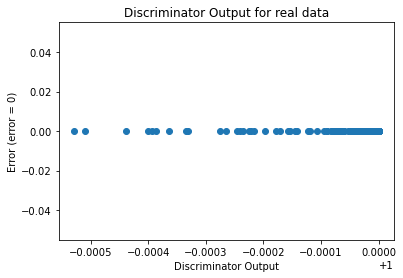

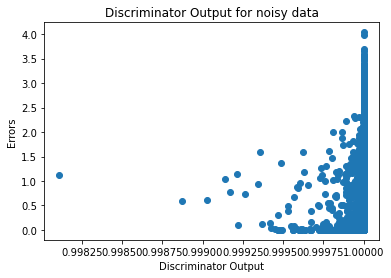

In [13]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [14]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3873]], device='cuda:0', requires_grad=True)
